In [41]:
import wave
import scipy as sp
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
from scipy.signal import chirp, spectrogram
from statistics import mean, median,variance,stdev
from scipy.io.wavfile import write
from scipy.fftpack import fft
import struct # バイナリデータを扱うとき使う
#3msのチャープ信号、200msのインターバルを流して、10kHz〜20kHzの帯域を流すプログラム

In [42]:
#チャープ信号生成
def chirp(numSamples, chirpLen_s, start_Hz, stop_Hz, phase_rad = 0):

    times_s = np.linspace(0, chirpLen_s, numSamples) # Chirp times.
    k = (stop_Hz - start_Hz) / chirpLen_s # Chirp rate.
    sweepFreqs_Hz = (start_Hz + k/2. * times_s) * times_s
    chirp = np.sin(phase_rad + 2 * np.pi * sweepFreqs_Hz)

    return chirp

In [59]:
sps = 524288 #FGのサンプリング周波数
siglen = int(0.003*sps)#信号長
interlen  = int(0.1*sps)#インターバルの信号長
start_hz =  10000
end_hz = 11000
upchirp = np.zeros(10*siglen).reshape(10,siglen)

for i in range(0,10):
    upchirp[i] = chirp(siglen,0.003,start_hz,end_hz,0) #アップチャープ
    start_hz += 1000
    end_hz += 1000


524288


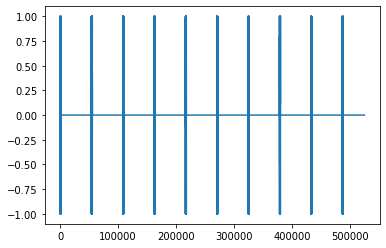

In [60]:
#インターバルの信号生成zeros
zeros = np.zeros(interlen)
full_upchirp = upchirp[0]
for j in range(0,9):#3msのチャープ信号、200msのインターバルを組み合わせる
    full_upchirp = np.append(full_upchirp,zeros)
    full_upchirp = np.append(full_upchirp,upchirp[j+1]) 
end = sps - len(full_upchirp)
zeros = np.zeros(end)
full_upchirp = np.append(full_upchirp,zeros)
print(len(full_upchirp))
plt.plot(full_upchirp)
plt.show()

total = []

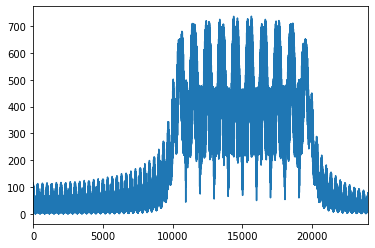

In [61]:
#上のセルで作った信号の周波数を確認
fq = abs(fft(full_upchirp)) #FFTで確認
plt.plot(fq)
plt.xlim(0,24000)
plt.show()

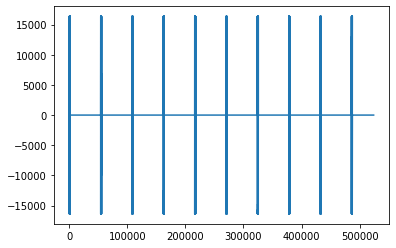

In [62]:
#アップチャープを送信
#total_upchirp = []
#total_upchirp = np.append(total_upchirp,upchirp)
#total_upchirp = np.append(total_upchirp,zeros9997ms)

#print("chirp length",len(upchirp))
#print("chirp length",len(zeros9997ms))
#print("chirp length",len(total_upchirp))

#振幅を量子化する。最大値を16bitの半分に設定
total_upchirp_16bit = 16383*full_upchirp

#アップチャープとダウンチャープを交互に出力
plt.plot(total_upchirp_16bit)
plt.show()

In [63]:
#txtファイル出力
upfname = "Upchirp_10k20k_3ms_python_20220321.txt"

#小数点20桁まで表示させて書き込む(毎回改行)
np.savetxt(upfname,total_upchirp_16bit,fmt='%.20f')